Dataset Source: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

Description: This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify.

Details:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

Target:
- Music analysis: Explore patterns in audio features to understand trends and preferences in popular songs.
- Platform comparison: Compare the song's popularity across different music platforms.
- Artist impact: Analyze how artist involvement and attributes relate to a song's success.
- Temporal trends: Identify any shifts in music attributes and preferences over time.
- Cross-platform presence: Investigate how songs perform across different streaming services.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [124]:
data = pd.read_csv("spotify-2023.csv", encoding = 'unicode_escape', engine ='python')

In [125]:
data.shape

(953, 24)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [127]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [128]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [129]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [130]:
categorical_columns = ['track_name', 'artist(s)_name', 'key', 'mode']
for col in data.columns:
    if col not in categorical_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [131]:
data["key"] = pd.Categorical(data["key"]).codes
data["mode"] = pd.Categorical(data["mode"]).codes

In [132]:
data.dropna(inplace = True)

Top 10 music of all times based on streams

In [133]:
data.sort_values(by = ["streams"], ascending = False).head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,4,0,76,91,50,54,0,7,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,3,0,59,48,76,4,0,10,5
621,Lucid Dreams,Juice WRLD,1,2017,6,15,14749,0,2.288695e+09,188,...,84,2,1,44,22,48,38,0,33,24
187,Circles,Post Malone,1,2019,8,30,19664,16,2.132336e+09,391,...,120,-1,0,70,59,75,24,0,9,4
433,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",2,2020,3,27,15894,8,1.802514e+09,198,...,103,8,1,70,92,83,1,0,7,6
115,No Role Modelz,J. Cole,1,2014,12,9,21164,36,1.791001e+09,80,...,100,1,1,70,47,52,30,0,6,33
555,Dakiti,"Bad Bunny, Jhay Cortez",2,2020,10,30,11215,21,1.763364e+09,189,...,110,6,1,73,14,57,40,0,11,5
169,When I Was Your Man,Bruno Mars,1,2012,12,5,2420,11,1.661187e+09,0,...,145,-1,0,60,43,27,94,0,14,4
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1.647990e+09,68,...,134,3,1,59,51,52,9,0,15,7
591,Before You Go,Lewis Capaldi,1,2019,11,1,8327,24,1.608045e+09,205,...,112,5,0,45,19,60,63,0,9,6


Music Analysis (Analysis below is false and incomplete)

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [135]:
ma_x = data[["key", "mode", "danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]]

In [136]:
ma_y = data["streams"]

In [139]:
scaler = StandardScaler()

In [140]:
scaler.fit(ma_x)

StandardScaler()

In [141]:
scaled_x = scaler.transform(ma_x)

In [142]:
pca = PCA(n_components = 2)

In [143]:
pca.fit(scaled_x)

PCA(n_components=2)

In [144]:
x_pca = pca.transform(scaled_x)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, ma_y, test_size=0.33, random_state=69)

In [146]:
lm = LinearRegression()

In [147]:
lm.fit(X_train, y_train)

LinearRegression()

In [148]:
predictions = lm.predict(X_test)

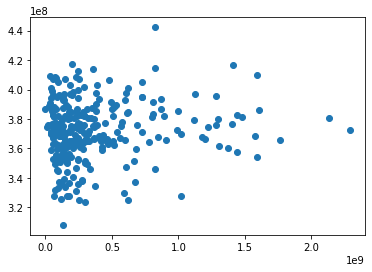

In [149]:
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='streams', ylabel='Density'>

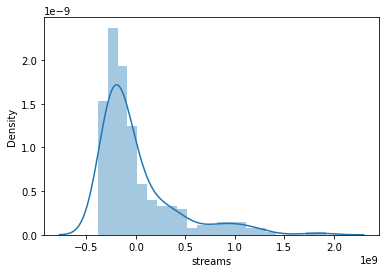

In [150]:
sns.distplot((y_test-predictions))

In [151]:
metrics.mean_absolute_error(y_test, predictions)

281362562.8912701